<a href="https://colab.research.google.com/github/deepakpracheta/Supervised-ML--Classification-Health-Insurance-Cross-Sell-Prediction/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

**Importing Libraries**

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import math
from scipy import stats
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import time
from datetime import datetime
from math import sqrt

# Model Selection and Metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier, reset_parameter
from sklearn.metrics import f1_score, recall_score, accuracy_score, roc_auc_score, precision_score, auc, roc_curve,classification_report
# Feature Engineering
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

# Hyperparamter Tuning
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

# **Data Inspection**

In [2]:
# MOUNTING THE GOOGLE DRIVE

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Projects/Supervised ML- Classification Health Insurance Cross Sell Prediction/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [4]:
#look at the top 5 rows in the dataframe
df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
# lets check last few rows
df.tail(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [6]:
# Checking the shape i.e no. of rows and columns in the data set
df.shape

(381109, 12)

In [7]:
# Getting the info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


There is no null values in the dataset, although we will check this later also.

Some of the columns will need an encoding before processing to the machine learning modeling

Id column will be dropped because it will not affect anything in our analysis and machine learning process

In [11]:
# Checking for NUll Values
df.isna().sum().to_frame().rename(columns={0:'Missing Value '})

,Missing Value
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


With this, we can say that there are no null values/missing values present in our dataset.

In [14]:
# statistical summary
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000




1.   The average customers vintage (numbers of day been insured in the compant is 154 days)

2.   The oldest customers in this dataset is 85 while the median is 36

3.   The most expensive annual premium is almost 17 times more expensive compared to the median annual premium.

4.   This data definitely need a scalling to get a better result in the machine learning process.



In [12]:
# Number of columns and number of unique values present in it

print('columns and number of unique values')
dict=[]
for i in df.columns:
    print(f'{i} --> {df[i].nunique()}')

columns and number of unique values
id --> 381109
Gender --> 2
Age --> 66
Driving_License --> 2
Region_Code --> 53
Previously_Insured --> 2
Vehicle_Age --> 3
Vehicle_Damage --> 2
Annual_Premium --> 48838
Policy_Sales_Channel --> 155
Vintage --> 290
Response --> 2


In [13]:
# check duplicates
df.duplicated().sum()

0

In [16]:
# Columns and number of unique values present in it
categorical_columns=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']
for category in categorical_columns:
    print(df[category].value_counts(), '\n_________________________\n')

Male      206089
Female    175020
Name: Gender, dtype: int64 
_________________________

1    380297
0       812
Name: Driving_License, dtype: int64 
_________________________

0    206481
1    174628
Name: Previously_Insured, dtype: int64 
_________________________

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64 
_________________________

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64 
_________________________

0    334399
1     46710
Name: Response, dtype: int64 
_________________________



**Observations:**

1. The customers range in age from 20 to 85 years old, and half of them are 25-49.
2. Half of the customers in this dataset have been with the company for 82 to 227 days.
3. A slight majority are male.
4. The vast majority have a driving license, about 99.8%.
5. Most vehicles are less than 2 years old.
6. Over half of vehicles have damage of some kind.
7. Only 12.3% of customers responded by buying vehicle insurance when asked.

# **Data Cleaning**

In [17]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

No missing or null values so there is nothing to remove

In [18]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


As ID column will note be needed for analysis or machine learning process.
So we remove it

In [19]:
df.drop(columns = 'id', inplace = True)

In [22]:
# Changing Data Types
df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].astype(int)
df['Region_Code'] = df['Region_Code'].astype(int)

# **Exploratory Data Analysis**

**Gender**

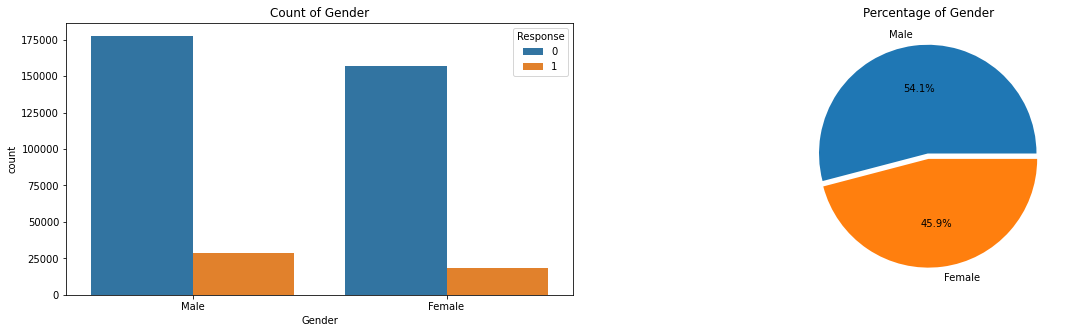

In [29]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Count of Gender')
sns.countplot(df['Gender'], hue=df['Response'])

plt.subplot(122)
plt.pie(df['Gender'].value_counts(), explode=[0.05,0] ,autopct='%.1f%%', 
        labels=['Male', 'Female'], labeldistance=1.1)
plt.title('Percentage of Gender')
plt.show()

In [46]:
x = pd.DataFrame({'total': df['Gender'].value_counts(),
              'Response=0':df.loc[df['Response'] == 0, 'Gender'].value_counts(),
              'Response=1':df.loc[df['Response'] == 1, 'Gender'].value_counts()})
x

,total,Response=0,Response=1
Male,206089,177564,28525
Female,175020,156835,18185


**Driving License**

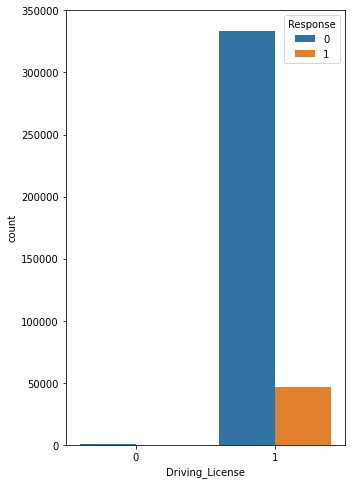

In [52]:
plt.figure(figsize=(5,8))
sns.countplot(df['Driving_License'], hue=df['Response'])
plt.show()

In [53]:
y = pd.DataFrame({'total': df['Driving_License'].value_counts(),
              'Response=0':df.loc[df['Response'] == 0, 'Driving_License'].value_counts(),
              'Response=1':df.loc[df['Response'] == 1, 'Driving_License'].value_counts()})
y

,total,Response=0,Response=1
1,380297,333628,46669
0,812,771,41
